In [6]:
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

df=pd.read_csv(r'D:\DataAnalysysHW\HW3\Dataset\ORGANICS.csv',encoding="cp1251")
print(df.shape) 
print(df.info())

df.isnull().any().any()

(22223, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 13 columns):
ID                 22223 non-null int64
DemAffl            21138 non-null float64
DemAge             20715 non-null float64
DemCluster         21549 non-null float64
DemClusterGroup    21549 non-null object
DemGender          19711 non-null object
DemReg             21758 non-null object
DemTVReg           21758 non-null object
PromClass          22223 non-null object
PromSpend          22223 non-null float64
PromTime           21942 non-null float64
TargetBuy          22223 non-null int64
TargetAmt          22223 non-null int64
dtypes: float64(5), int64(3), object(5)
memory usage: 2.2+ MB
None


True

In [31]:
df = df.dropna()
df.isnull().any().any()
print(df.shape) 

(16408, 13)


In [32]:
x=df[['DemAffl','DemAge','DemCluster','PromSpend','PromTime']]
y=df.values[::,11]
y=y.astype('int')

In [33]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
y_train = y_train.astype(int)

In [34]:
tree=DecisionTreeClassifier(max_depth=5, random_state=0, criterion = "entropy")
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [35]:
y_test = y_test.astype(int)
accuracy_score(y_test, tree.predict(X_test))

0.7942311598618729

0.7926061344708512

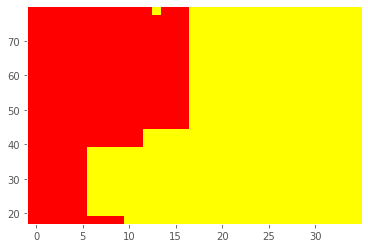

In [52]:
def get_grid(data, eps=0.01):
    x_min, x_max = data.iloc[:, 0].min() - 1, data.iloc[:, 0].max() + 1
    y_min, y_max = data.iloc[:, 1].min() - 1, data.iloc[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, eps),
                         np.arange(y_min, y_max, eps))

x = df[['DemAffl', 'DemAge']]
y = df.values[::,11]
y=y.astype('int')

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
y_train = y_train.astype(int)
tree.fit(X_train, y_train)

xx, yy = get_grid(X_train)
predicted = tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')

y_test = y_test.astype(int)
accuracy_score(y_test, tree.predict(X_test))

Выполним предыдущий пункт для разных значений глубины дерева и минимального числа объектов в листе:

0.7820434694292099

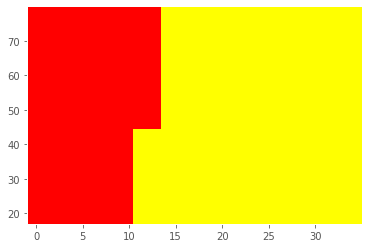

In [51]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf = 1, random_state=0)
y_train = y_train.astype(int)
tree.fit(X_train, y_train)

xx, yy = get_grid(X_train)
predicted = tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')

y_test = y_test.astype(int)
accuracy_score(y_test, tree.predict(X_test))

0.7999187487304489

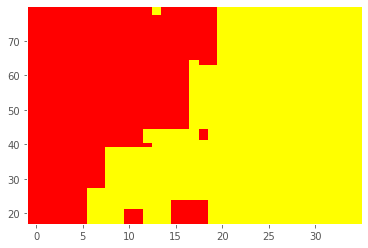

In [53]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
tree = DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf = 3, random_state=0)
y_train = y_train.astype(int)
tree.fit(X_train, y_train)

xx, yy = get_grid(X_train)
predicted = tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')

y_test = y_test.astype(int)
accuracy_score(y_test, tree.predict(X_test))

0.8007312614259597

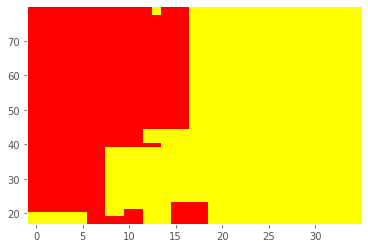

In [54]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
tree = DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf = 1, random_state=0)
y_train = y_train.astype(int)
tree.fit(X_train, y_train)

xx, yy = get_grid(X_train)
predicted = tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')

y_test = y_test.astype(int)
accuracy_score(y_test, tree.predict(X_test))

0.7883404428194191

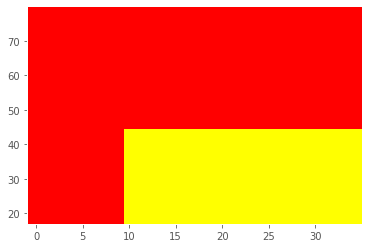

In [55]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
tree = DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf = 3, random_state=0)
y_train = y_train.astype(int)
tree.fit(X_train, y_train)

xx, yy = get_grid(X_train)
predicted = tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')

y_test = y_test.astype(int)
accuracy_score(y_test, tree.predict(X_test))

0.7891529555149299

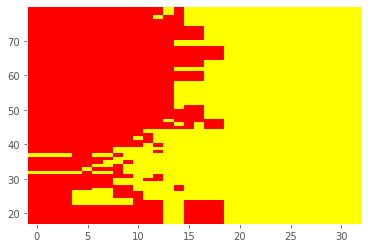

In [56]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
tree = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf = 3, random_state=0)
y_train = y_train.astype(int)
tree.fit(X_train, y_train)

xx, yy = get_grid(X_train)
predicted = tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')

y_test = y_test.astype(int)
accuracy_score(y_test, tree.predict(X_test)) 

Бинарное кодирование категориальных признаков

In [100]:
columns_to_bincode = [c for c in df.columns if df[c].dtype.name == 'object']
ohe = OneHotEncoder(sparse=False)
df2 = df
for c in columns_to_bincode:
    new_ohe_features = ohe.fit_transform(df[c].values.reshape(-1,1))
    tmp = pd.DataFrame(new_ohe_features, columns=[df[c].name + str(i) for i in range(new_ohe_features.shape[1])])
    df2 = pd.concat([df2, tmp], axis=1)
df2

,ID,DemAffl,DemAge,DemCluster,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,...,DemTVReg6,DemTVReg7,DemTVReg8,DemTVReg9,DemTVReg10,DemTVReg11,PromClass0,PromClass1,PromClass2,PromClass3
0,140.0,10.0,76.0,16.0,C,U,Midlands,Wales & West,Gold,16000.00,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,620.0,4.0,49.0,35.0,D,U,Midlands,Wales & West,Gold,6000.00,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,868.0,5.0,70.0,27.0,D,F,Midlands,Wales & West,Silver,0.02,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1120.0,10.0,65.0,51.0,F,M,Midlands,Midlands,Tin,0.01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2313.0,11.0,68.0,4.0,A,F,Midlands,Midlands,Tin,0.01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16400,36752254.0,9.0,59.0,52.0,F,U,Midlands,Wales & West,Gold,11052.66,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16401,36755407.0,14.0,45.0,9.0,B,F,South East,London,Silver,500.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16403,36757558.0,7.0,37.0,44.0,E,F,South East,London,Gold,6000.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16404,36763884.0,4.0,52.0,35.0,D,U,South East,London,Silver,3000.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
